In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [116]:
student = pd.read_csv('Student_Performance.csv')
student

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


#**Evaluasi Data Analisis (EDA)**

In [117]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [118]:
student.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [119]:
student.duplicated().sum()

127

In [120]:
# hapus data duplikat
student = student.drop_duplicates()
student.duplicated().sum()

0

In [121]:
student.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

#**Melihat ada Outlier atau tidak**

<Axes: xlabel='Previous Scores'>

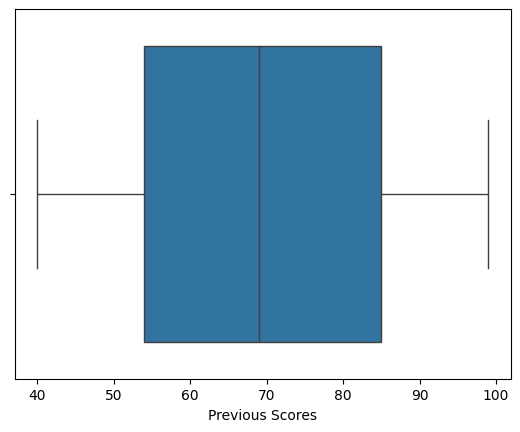

In [122]:
sns.boxplot(x=student['Previous Scores'])

<Axes: xlabel='Hours Studied'>

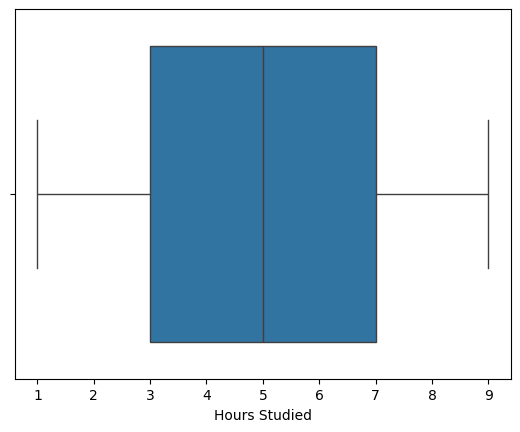

In [123]:
sns.boxplot(x=student['Hours Studied'])

<Axes: xlabel='Sleep Hours'>

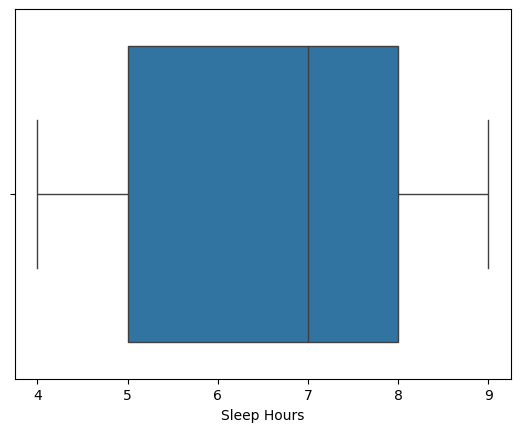

In [124]:
sns.boxplot(x=student['Sleep Hours'])

<Axes: xlabel='Sample Question Papers Practiced'>

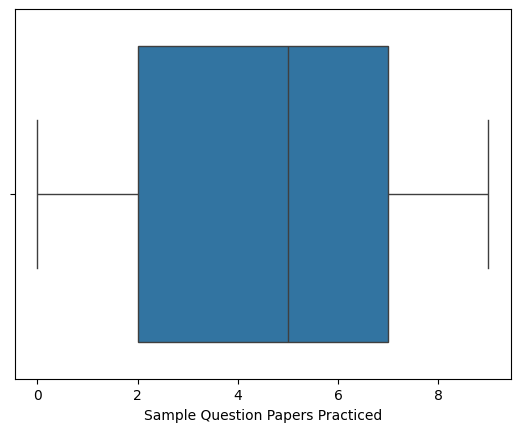

In [125]:
sns.boxplot(x=student['Sample Question Papers Practiced'])

#**Univariate**

In [126]:
numerical_features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
categorical_features =['Extracurricular Activities']

Fitur Extrakurikuler


                            jumlah  persentase
Extracurricular Activities                    
No                            4986        50.5
Yes                           4887        49.5


<Axes: title={'center': 'Extracurricular Activities'}, xlabel='Extracurricular Activities'>

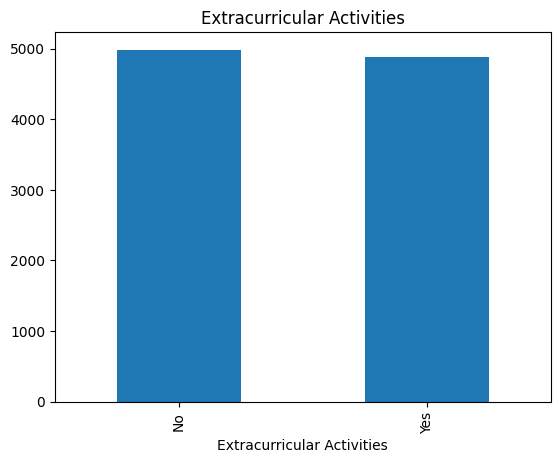

In [127]:
feature = categorical_features[0]
count = student[feature].value_counts()
percent = 100*student[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

#**Numerical Features**

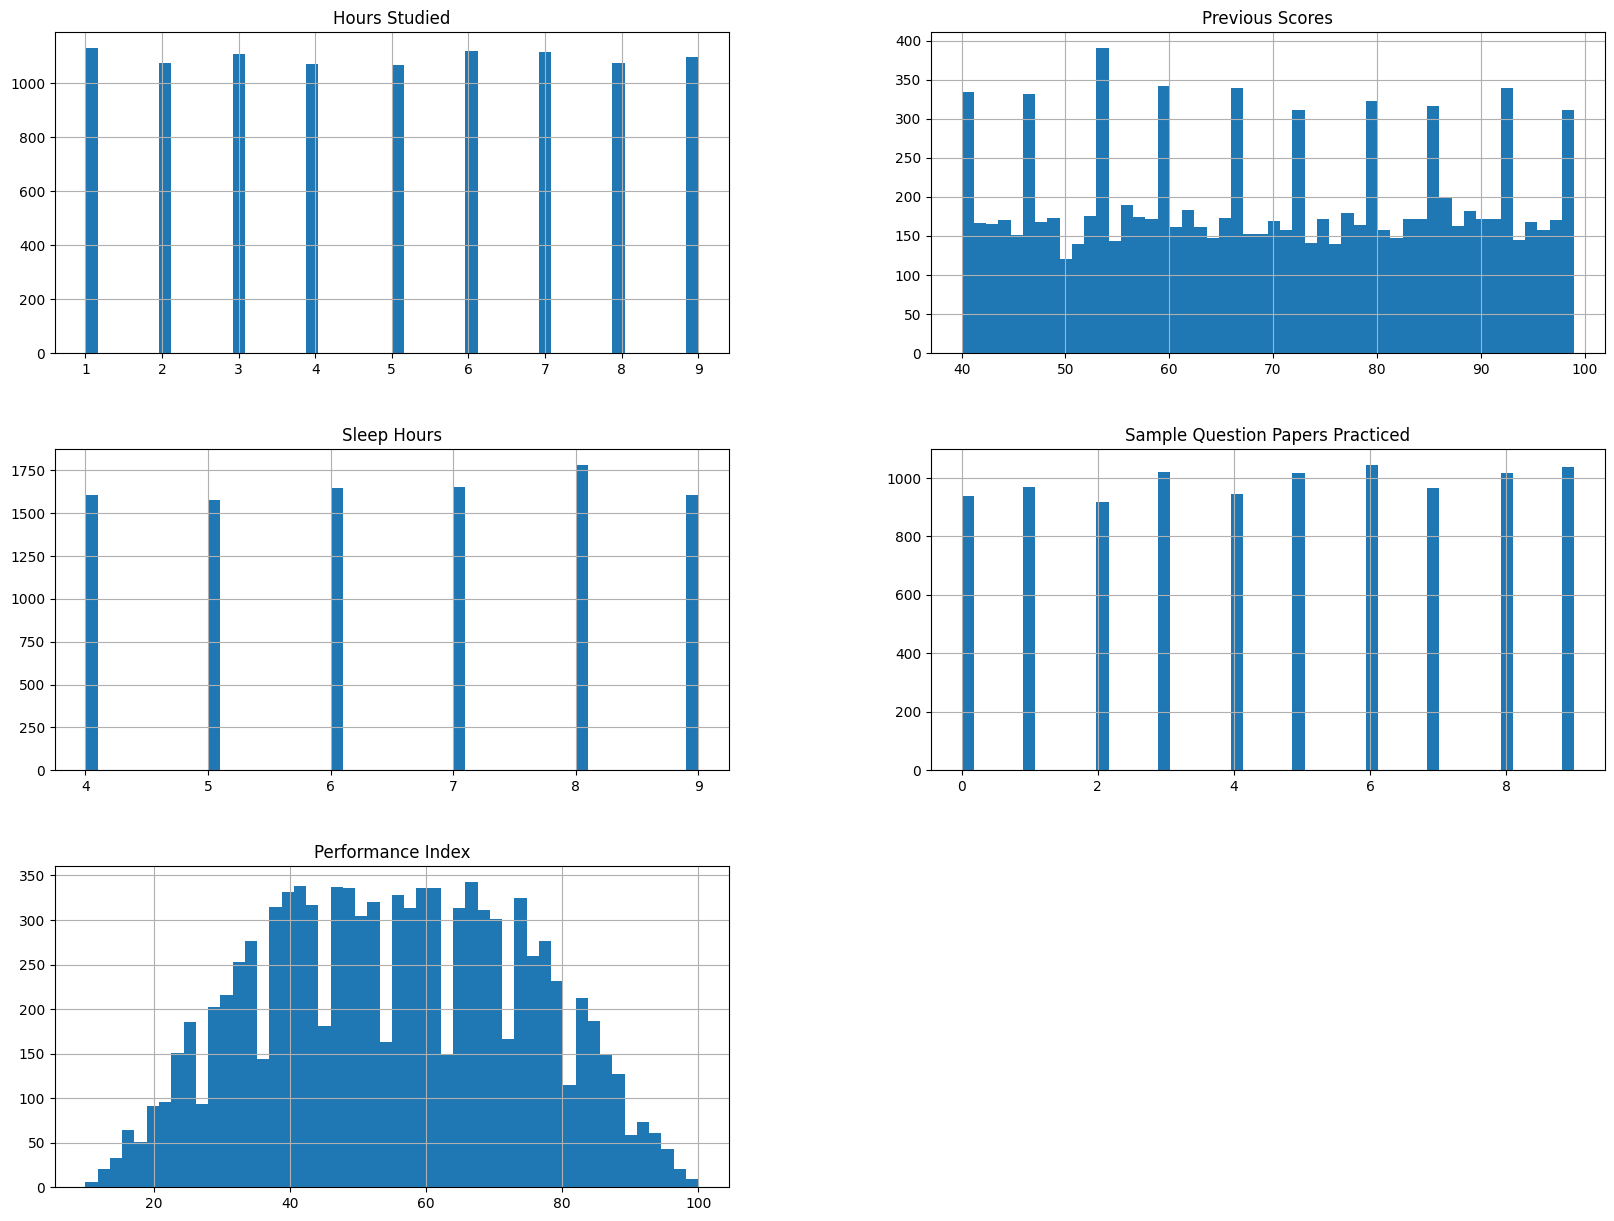

In [128]:
student.hist(bins=50, figsize=(20,15))
plt.show()

#**Categorical Features**

<ipython-input-129-768fb43f47ab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Performance Index", kind="bar", dodge=False, height = 4, aspect = 3,  data=student, palette="Set3")


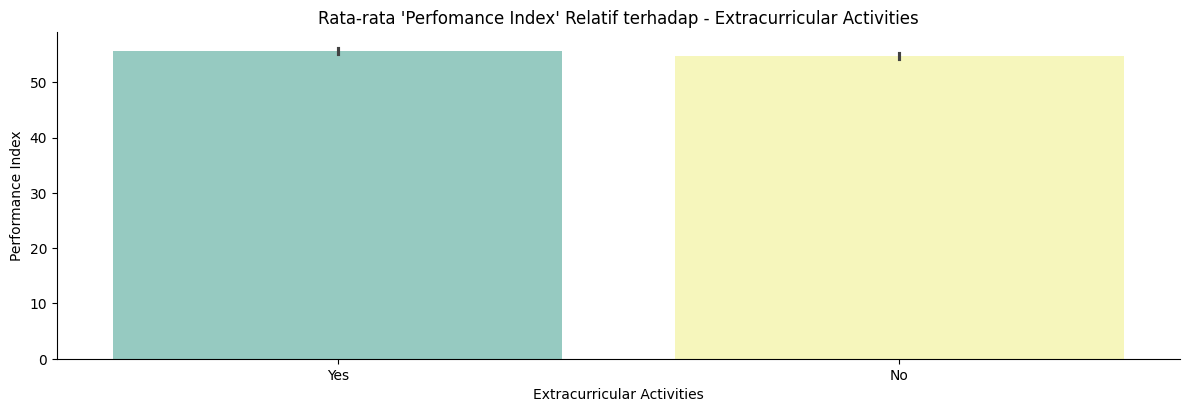

In [129]:
cat_features = student.select_dtypes(include=['object']).columns.tolist()

for col in cat_features:
    sns.catplot(x=col, y="Performance Index", kind="bar", dodge=False, height = 4, aspect = 3,  data=student, palette="Set3")
    plt.title("Rata-rata 'Perfomance Index' Relatif terhadap - {}".format(col))

# **Numerical Features**

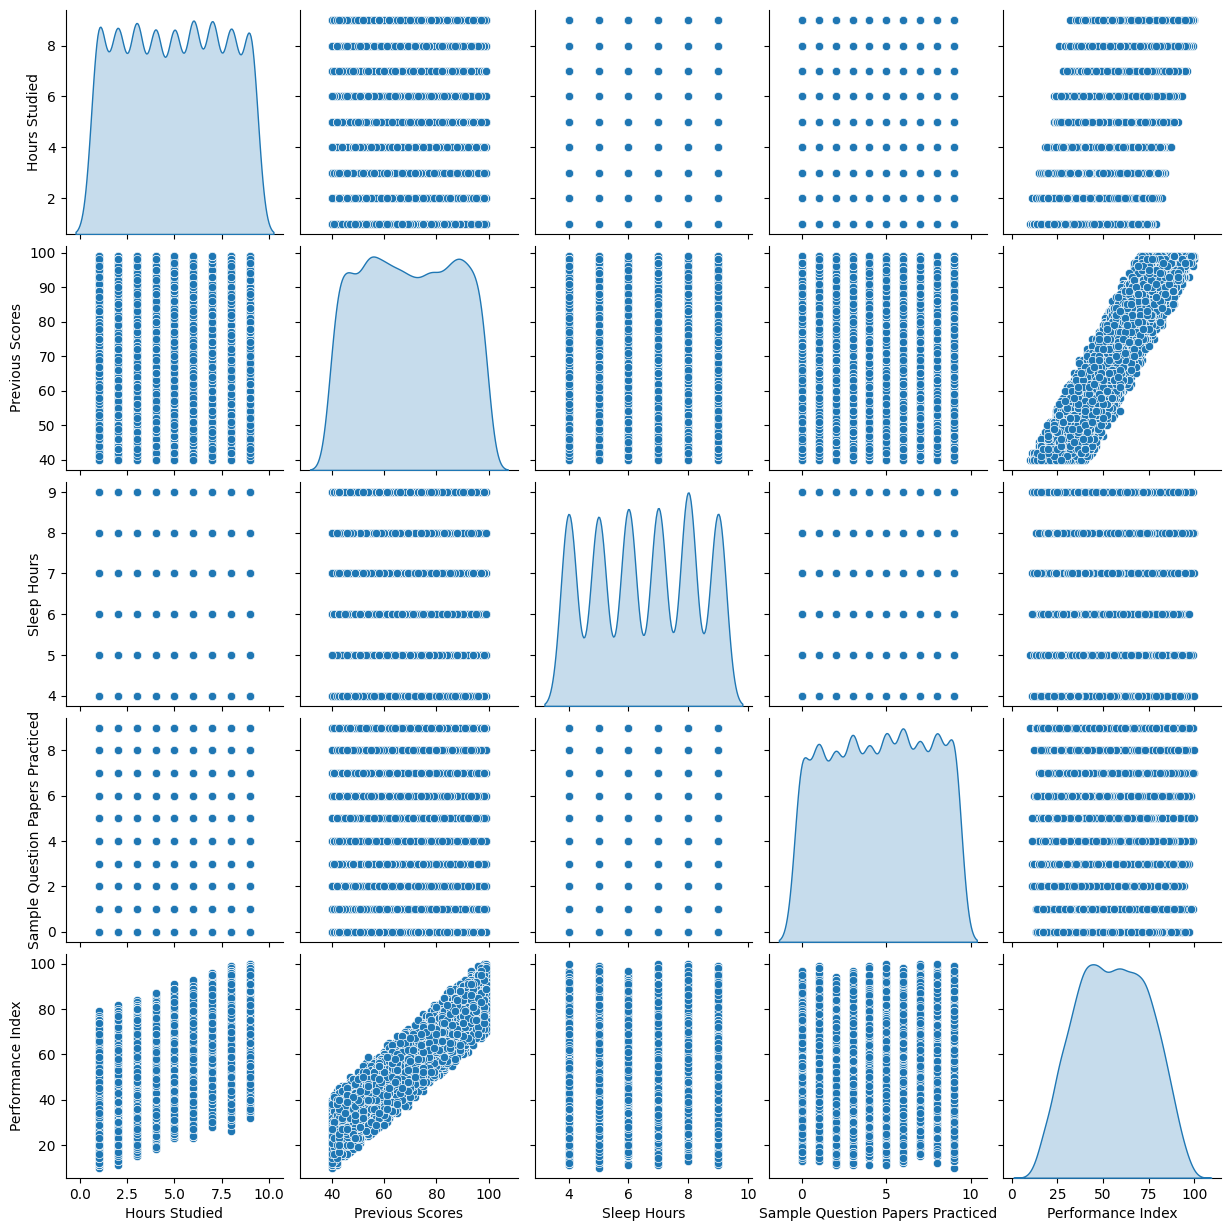

In [130]:
sns.pairplot(student, diag_kind='kde')

Text(0.5, 1.0, 'Korelasi Antar Fitur Numerik')

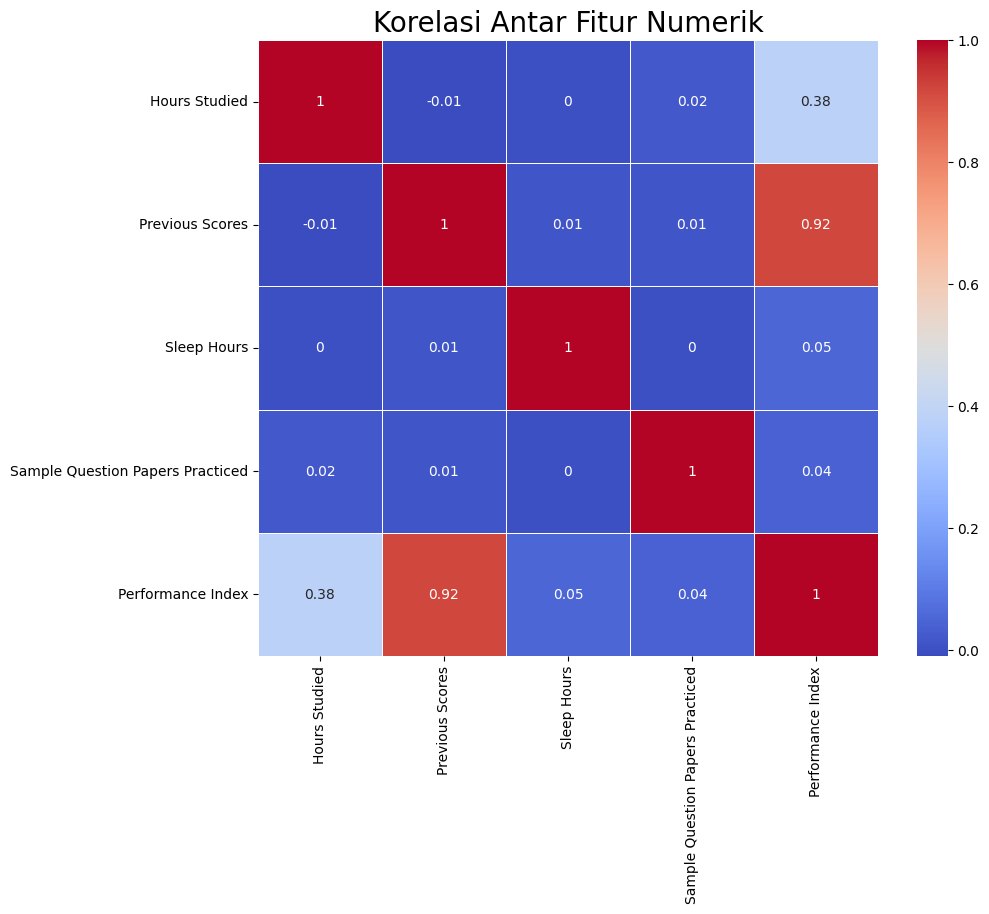

In [131]:
plt.figure(figsize=(10,8))
korelasi_matrix = student[numerical_features].corr().round(2)

sns.heatmap(korelasi_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Antar Fitur Numerik', size=20)

**Drop features *sleep Hours* dan *Sample Question Papers* Praticed**

In [132]:
student.drop(['Sleep Hours', 'Sample Question Papers Practiced'], axis=1, inplace=True)
student.head()

<ipython-input-132-4637fbfc792c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student.drop(['Sleep Hours', 'Sample Question Papers Practiced'], axis=1, inplace=True)


,Hours Studied,Previous Scores,Extracurricular Activities,Performance Index
0,7,99,Yes,91.0
1,4,82,No,65.0
2,8,51,Yes,45.0
3,5,52,Yes,36.0
4,7,75,No,66.0


#**Data Preparation**

endcoding

In [133]:
import pandas as pd
Extracurricular = pd.get_dummies(student['Extracurricular Activities'], prefix='Extracurricular Activities').astype(int)
student = pd = pd.concat([student, Extracurricular], axis=1)
student.drop(['Extracurricular Activities'], axis=1, inplace=True)
student.head()

,Hours Studied,Previous Scores,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,91.0,0,1
1,4,82,65.0,1,0
2,8,51,45.0,0,1
3,5,52,36.0,0,1
4,7,75,66.0,1,0


#**Train Test Split**

In [134]:
from sklearn.model_selection import train_test_split

X = student.drop(["Performance Index"],axis =1)
y = student["Performance Index"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [135]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 9873
Total # of sample in train dataset: 7898
Total # of sample in test dataset: 1975


#**Standart Scaler**

In [136]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Hours Studied','Previous Scores']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Hours Studied,Previous Scores
1710,0.774275,0.314064
3446,-1.159453,-1.189502
3697,-1.546199,0.256235
1593,1.547766,-1.362991
6206,1.161020,-0.784696


In [137]:
X_train[numerical_features].describe().round(4)

,Hours Studied,Previous Scores
count,7898.0000,7898.0000
mean,0.0000,0.0000
std,1.0001,1.0001
min,-1.5462,-1.7100
25%,-0.7727,-0.9004
50%,0.0008,0.0249
75%,0.7743,0.8924
max,1.5478,1.7020


#**Model**

In [138]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])


In [139]:
# KNN
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [140]:
# Random Forest
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

In [141]:
# Boosting
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

**#Scaling Test**

In [142]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

#**MSE**

In [143]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

In [144]:
mse

,train,test
KNN,0.004737,0.00594
RF,0.004456,0.006209
Boosting,0.026221,0.027936


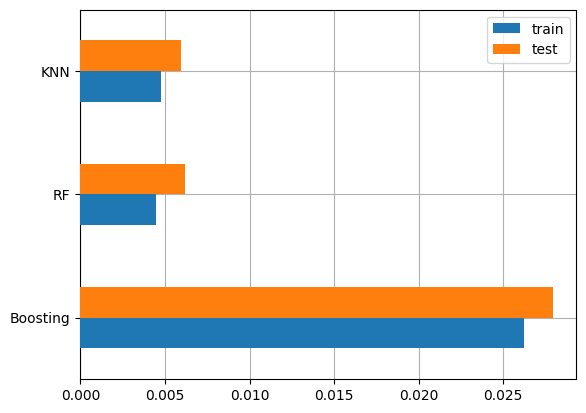

In [145]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [146]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
209,33.0,33.7,33.4,41.3
